# Linear regression

In [2]:
import numpy as np
from matplotlib import pyplot as plt
from itertools import product

from mlfz.nn import Model
from mlfz.nn.tensor import Tensor, mean_squared_error

In [4]:
def visualize_model(model, xs, ys, res=100, xrange=(-10, 10), yrange=(-10, 10)):
    with plt.style.context("seaborn-v0_8-white"):
        plt.figure(figsize=(8, 8))
        
        res = 100
        x = np.linspace(xrange[0], xrange[1], res)
        y = np.linspace(yrange[0], yrange[1], res)
        xx, yy = np.meshgrid(x, y)
        zz = np.zeros_like(xx)
        
        for i, j in product(range(res), range(res)):
            model_input = Tensor(np.array([xx[i, j], yy[i, j]]))
            zz[i, j] = model.forward(model_input).value

        # plot the decision boundary
        plt.contourf(xx, yy, zz, levels=100, cmap='coolwarm_r', alpha=0.4)
        plt.xlabel('x')
        plt.ylabel('y')
        plt.title('the decision boundary of our model')
        
        # plot the data
        plt.scatter([x[0] for x in xs], [x[1] for x in xs], c=ys, cmap=plt.cm.coolwarm_r, zorder=10)
        plt.show()

In [17]:
class LinearRegression(Model):
    def __init__(self):
        self.A = Tensor.from_random(2, 1)
        self.b = Tensor.from_random(1)

    def forward(self, x):
        return x @ self.A + self.b
    
    def parameters(self):
        return {"A": self.A, "b": self.b}


In [42]:
xs = Tensor.from_random(100, 2)   # data
ys = xs @ Tensor([[2], [1]]) - Tensor(0.5)   # ground truth

/tmp/ipykernel_4870/836790412.py:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  zz[i, j] = model.forward(model_input).value


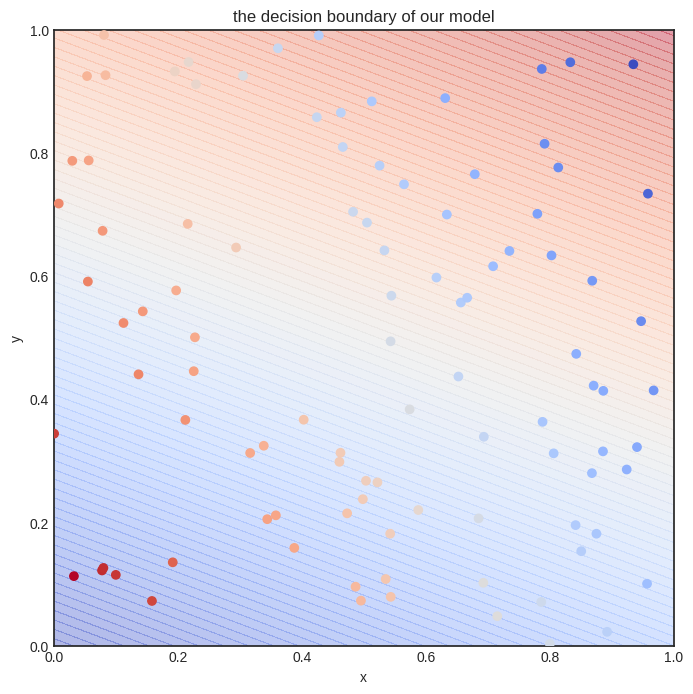

In [44]:
model = LinearRegression()

visualize_model(model, xs, ys, xrange=(0, 1), yrange=(0, 1))

In [45]:
n_steps = 1000

for _ in range(n_steps):
    preds = model.forward(xs)
    l = mean_squared_error(preds, ys)
    if _ % 100 == 0:
        print(f"step no. {_}, l = {l.value}")
    l.backward()
    model.gradient_update(lr=0.01)

step no. 0, l = [[3.39368434]]
step no. 100, l = [[0.30991582]]
step no. 200, l = [[0.25183707]]
step no. 300, l = [[0.2088943]]
step no. 400, l = [[0.17331016]]
step no. 500, l = [[0.14380624]]
step no. 600, l = [[0.11933773]]
step no. 700, l = [[0.09904122]]
step no. 800, l = [[0.08220262]]
step no. 900, l = [[0.06823093]]


/tmp/ipykernel_4870/836790412.py:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  zz[i, j] = model.forward(model_input).value


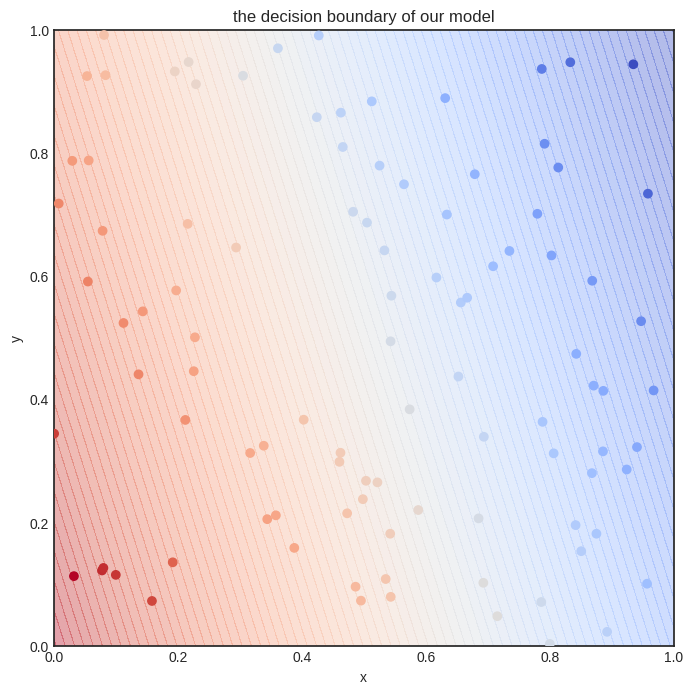

In [46]:
visualize_model(model, xs, ys, xrange=(0, 1), yrange=(0, 1))

In [40]:
model.b

Tensor([-0.1095998])